In [37]:
import numpy as np
import pandas as pd

from tensorflow import keras
from subprocess import check_output
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM, GRU
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import BatchNormalization
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.models import load_model
from sklearn.metrics import r2_score

In [38]:

data =  pd.read_csv('Tesla.csv', header=0)
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


(1692, 1)


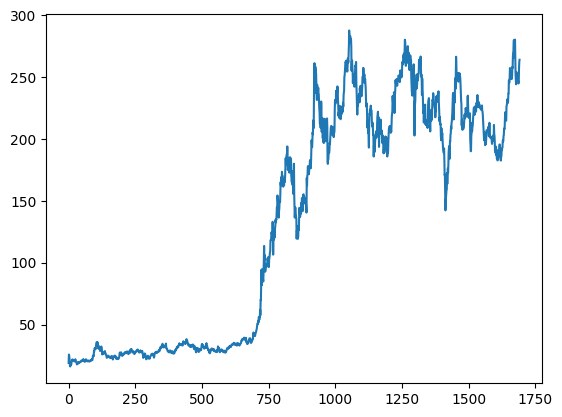

In [39]:
data['Open'].plot()
open_data = data[['Open']]
print(open_data.shape)
open_data = open_data.to_numpy()

In [40]:
train_size = int(len(open_data) * 0.75)
test_size = len(open_data) - train_size
train, test = open_data[0:train_size,:], open_data[train_size:len(open_data),:]
print(len(train), len(test))

1269 423


In [41]:
def data_create(shift,data):
    DataX = []
    DataY = []
    for i in range(len(data)-shift):
        DataX.append(data[i:i+shift,0])
        DataY.append(data[i+shift,0])
    DataX = np.array(DataX)
    DataY = np.array(DataY)
    return DataX,DataY

In [42]:
shift = 60
trainX, trainY = data_create(shift,train)
testX, testY = data_create(shift,test)

print(trainX.shape,trainY.shape)
print(testX.shape)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print(trainX.shape,trainY.shape)
print(testX.shape)

(1209, 60) (1209,)
(363, 60)
(1209, 60, 1) (1209,)
(363, 60, 1)


In [43]:
def Create_LSTM():
    # LSTM
    model =Sequential()
    model.add(LSTM(50,return_sequences=True, input_shape=(trainX.shape[1],1)))
    # model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences= False))
    # model.add(Dropout(0.2))
    # model.add(BatchNormalization())
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(1))

    model.compile(optimizer = 'adam', loss = 'mse' , metrics="mean_absolute_error")
    
    return(model)
    
def Create_RNN():
    model = Sequential() # Model
    model.add(keras.Input(shape=(trainX.shape[1],1)))
    model.add(keras.layers.SimpleRNN(units=64,return_sequences=True))
    model.add(keras.layers.SimpleRNN(units=128,return_sequences=True))
    model.add(keras.layers.SimpleRNN(units=200,return_sequences=True))
    model.add(keras.layers.SimpleRNN(units=64,return_sequences=True))
    model.add(keras.layers.SimpleRNN(units=64,return_sequences=False))
    model.add(Dense(units=32)) 
    model.add(Dense(units=16)) 
    model.add(Dense(units=1, activation='linear'))

    model.compile(optimizer = 'adam', loss = 'mse' , metrics="mean_absolute_error")
    
    return(model)
    

In [44]:
model = Create_RNN()
model.summary()

# # uncomment to train again - 
model.fit(
     trainX,
     trainY,
     batch_size=32,
     epochs=20,
     validation_split=0.05)

model.save('rnn_model_v2.h5')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 60, 64)            4224      
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 60, 128)           24704     
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 60, 200)           65800     
                                                                 
 simple_rnn_18 (SimpleRNN)   (None, 60, 64)            16960     
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)               

c:\Users\tikum\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
model = Create_LSTM()
model.summary()

# # uncomment to train again - 
model.fit(
     trainX,
     trainY,
     batch_size=32,
     epochs=20,
     validation_split=0.05)

model.save('lstm_model_no_minmax.h5')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 64)                29440     
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
36/36

In [46]:
def cal_RMSE(test, predict):
    RMSE = np.sqrt(np.mean( test - predict )**2)
    print("RMSE = ",RMSE)

RNN model
12/12 [==============================] - 1s 26ms/step
Pridiction shape =  (363, 1)
RMSE =  2.2247200774389855
r2_score =  0.8908193608091431


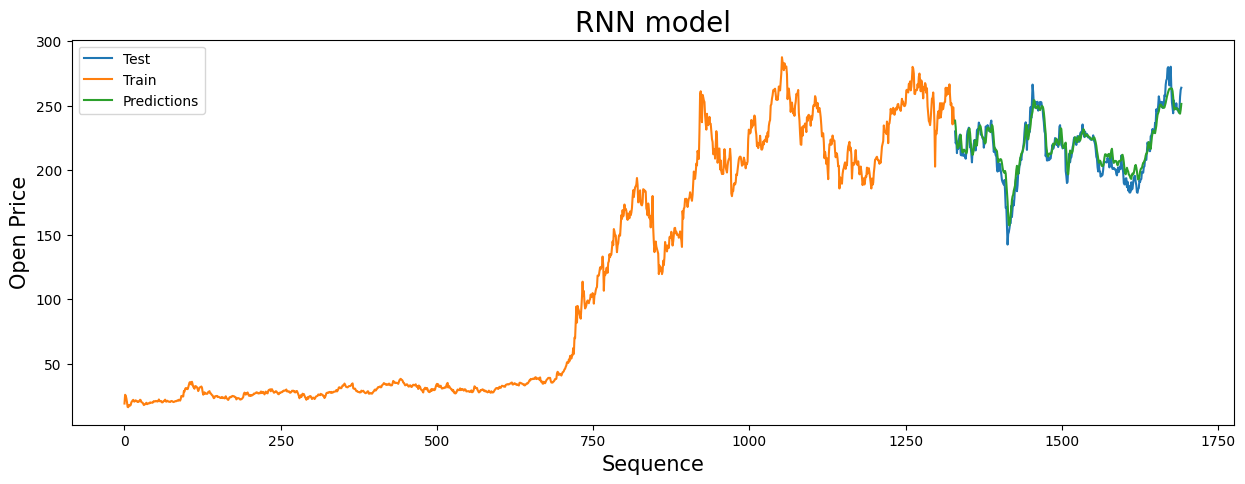

In [47]:
print("RNN model")
model = load_model('rnn_model_v2.h5')

predictions = model.predict(testX)
print("Pridiction shape = ",predictions.shape)
    
cal_RMSE(testY,predictions)
r2 = r2_score(testY,predictions)
print("r2_score = ",r2)

data =  pd.read_csv('Tesla.csv', header=0)
dataset = data["Open"]
dataset = pd.DataFrame(dataset)
data = dataset.values

train = dataset.iloc[:train_size+shift , 0:1]
test = dataset.iloc[train_size+shift:, 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(15,5))
plt.title('RNN model', fontsize=20)
plt.ylabel('Open Price' ,fontsize=15)
plt.xlabel('Sequence', fontsize=15)
plt.plot(test['Open'])
plt.plot(train['Open'])
plt.plot(test["Predictions"])
plt.legend(['Test','Train','Predictions'])


LSTM model
12/12 [==============================] - 1s 24ms/step
Pridiction shape =  (363, 1)
RMSE =  5.414980651889096
r2_score =  0.8722416963780709


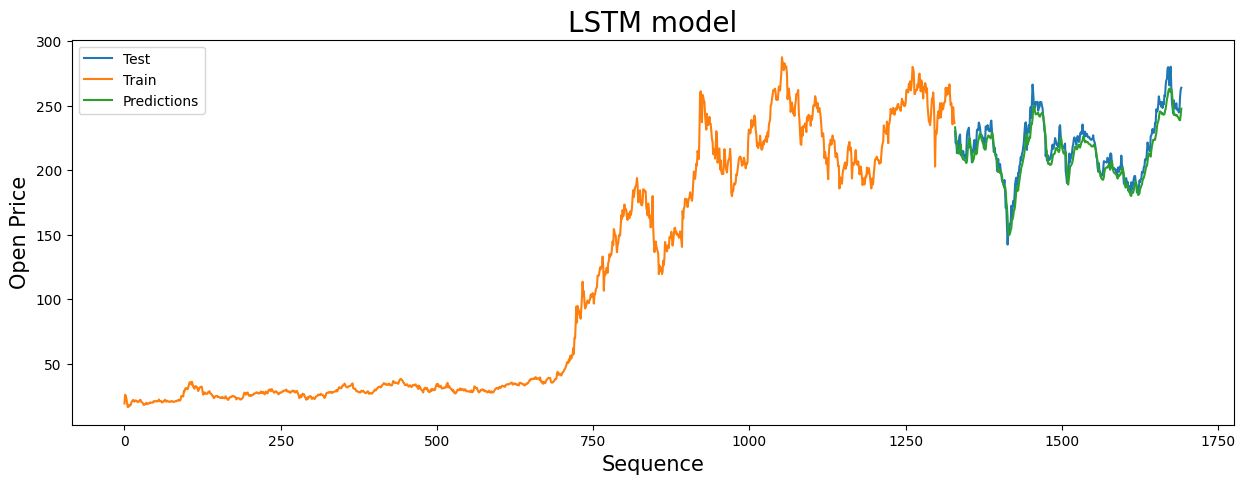

In [50]:
print("LSTM model")
model = load_model('lstm_model_no_minmax.h5')

predictions = model.predict(testX)
print("Pridiction shape = ",predictions.shape)
    
cal_RMSE(testY,predictions)
r2 = r2_score(testY,predictions)
print("r2_score = ",r2)

data =  pd.read_csv('Tesla.csv', header=0)
dataset = data["Open"]
dataset = pd.DataFrame(dataset)
data = dataset.values

train = dataset.iloc[:train_size+shift , 0:1]
test = dataset.iloc[train_size+shift:, 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(15,5))
plt.title('LSTM model', fontsize=20)
plt.ylabel('Open Price' ,fontsize=15)
plt.xlabel('Sequence', fontsize=15)
plt.plot(test['Open'])
plt.plot(train['Open'])
plt.plot(test["Predictions"])
plt.legend(['Test','Train','Predictions'])